## Weather Prediction with Deep Learning (30 minutes)
Denis Akhiyarov
    * Senior Consultant at Wood
    * Python.NET (Python for .NET) core developer
    * Faculty at North American University
    
https://notebooks.azure.com/denfromufa/libraries/pmlc


## Economics of weather forecasting?

<table>
<tr>
   <td>
       <!---->
     <ul>
        <h3>1. Insurance and reinsurance</h3>
        <h3>2. Transportation (air, taxi, boats)</h3>
        <h3>3. Agriculture and fishing</h3>
        <h3>4. Input for energy industry</h3>
        <h3>5. Climate change and extreme events</h3>     
     </ul> 
 </td>
 <td> 
   <p>
     <img src="https://rstorage.filemobile.com/storage/23092306/1085" 
          alt>
     <!-- width="600" height="400" --> 
   </p>
   <p>
     <em>https://www.theweathernetwork.com</em>
   </p>
  </td>
</tr>
</table>


## Yandex Weather

https://yandex.com/company/blog/winter-is-coming-yandex-weather-nowcasting-helps-users-plan-for-precipitation

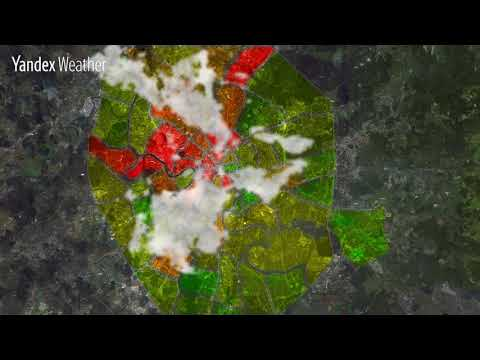

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('aR5p7_g8qXQ', width=800, height=600)

## Deep Learning at 15 PFlops Enables Training for Extreme Weather Identification at Scale
National Energy Research Scientific Computing Center

![](https://6lli539m39y3hpkelqsm3c2fg-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Intel-NERSC-feature-graphic-weather-675x380.png)

## Package imports

In [0]:
import pandas as pd
import numpy as np
from numpy import exp
from IPython.display import HTML, Latex, Math, display
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sympy.printing import latex
from sympy.core.sympify import sympify
%matplotlib inline
pd.options.display.max_columns=50
pd.options.display.max_colwidth=100
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['figure.figsize'] = (3, 2)
fontsize=3
matplotlib.rcParams['figure.titlesize'] = fontsize
matplotlib.rcParams['axes.labelsize'] = fontsize
matplotlib.rcParams['font.size'] = fontsize
matplotlib.rcParams['axes.titlesize'] = fontsize
matplotlib.rcParams['legend.fontsize'] = fontsize
matplotlib.rcParams['xtick.labelsize'] = fontsize
matplotlib.rcParams['ytick.labelsize'] = fontsize
matplotlib.rcParams['lines.markersize'] = 2

## How to get weather data?!

Even Google Datasets does not explain well, multiple commercial offerings online


https://www.kaggle.com/selfishgene/historical-hourly-weather-data

Historic data of weather in Houston requested and retrieved from Department of Commerce > NOAA > NESDIS > NCEI

https://www.ncdc.noaa.gov/

![alt text](https://raw.githubusercontent.com/denfromufa/deepweather/master/Capture.PNG)

## Data Exploration

Let's read the head of the table and look at the data using pandas

In [3]:
dfhtown=pd.read_csv("https://raw.githubusercontent.com/denfromufa/deepweather/master/9693687323818dat.txt", delim_whitespace=True)
dfhtown.head()

,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW.1,MW.2,MW.3,AW,AW.1,AW.2,AW.3,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
0,720617,208,201604010015,***,0,***,722,CLR,*,*,*,10.0,**,**,**,**,**,**,**,**,*,79,66,******,29.67,******,***,***,*****,*****,*****,*****,**
1,720617,208,201604010035,330,6,***,722,CLR,*,*,*,9.1,**,**,**,**,**,**,**,**,*,75,66,******,29.66,******,***,***,*****,*****,*****,*****,**
2,720617,208,201604010055,330,3,***,722,CLR,*,*,*,10.0,**,**,**,**,**,**,**,**,*,73,66,******,29.67,******,***,***,*****,*****,*****,*****,**
3,720617,208,201604010115,330,6,***,722,CLR,*,*,*,10.0,**,**,**,**,**,**,**,**,*,73,66,******,29.68,******,***,***,*****,*****,*****,*****,**
4,720617,208,201604010135,340,7,***,722,CLR,*,*,*,10.0,**,**,**,**,**,**,**,**,*,72,64,******,29.70,******,***,***,*****,*****,*****,*****,**


The data is messy, the names of columns not clear, so let's look at html version. Again using pandas!

In [4]:
import sys
!pip install lxml html5lib

    100% |████████████████████████████████| 5.8MB 5.4MB/s 
    100% |████████████████████████████████| 122kB 26.1MB/s 


In [0]:
dfheader=pd.read_html("https://raw.githubusercontent.com/denfromufa/deepweather/master/72061700208-2016-04_9693687323818dat.html")

In [6]:
def pd2html(df, header=False, index=False):
    return HTML(df.to_html(index=False, header=False))
pd2html(dfheader[0])

AWS ID 720617,WBAN ID 00208,Name HOUSTON EXECUTIVE AIRPORT,Country UNITED STATES,State TEXAS,Latitude +29.800,Longitude -095.900,Elevation +0051.2 (meters)


In [7]:
pd2html(dfheader[1][:2])

USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW,MW,MW,AW,AW,AW,AW,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
NaN,NaN,GMT,NaN,MPH,MPH,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F,Mb,inches,Mb,F,F,inches,inches,inches,inches,inches


## Data cleaning

Let's set the index of dataframe (table) to dates

In [8]:
dfhtown.set_index(dfhtown.columns[2], inplace=True)
dfhtown.head(3)

,USAF,WBAN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW.1,MW.2,MW.3,AW,AW.1,AW.2,AW.3,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
YR--MODAHRMN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201604010015,720617,208,***,0,***,722,CLR,*,*,*,10.0,**,**,**,**,**,**,**,**,*,79,66,******,29.67,******,***,***,*****,*****,*****,*****,**
201604010035,720617,208,330,6,***,722,CLR,*,*,*,9.1,**,**,**,**,**,**,**,**,*,75,66,******,29.66,******,***,***,*****,*****,*****,*****,**
201604010055,720617,208,330,3,***,722,CLR,*,*,*,10.0,**,**,**,**,**,**,**,**,*,73,66,******,29.67,******,***,***,*****,*****,*****,*****,**


In [9]:
dfhtown.index=pd.to_datetime(dfhtown.index, format="%Y%m%d%H%M")
dfhtown.index.name='datetime'
dfhtown.replace(to_replace='\*+', value=np.nan, regex=True, inplace=True)
dfhtown.dropna(axis=1, inplace=True, how='all')
dfhtown.head()

,USAF,WBAN,DIR,SPD,GUS,CLG,SKC,VSB,AW,TEMP,DEWP,ALT
datetime,,,,,,,,,,,,
2016-04-01 00:15:00,720617,208,NaN,0,NaN,722,CLR,10.0,NaN,79,66,29.67
2016-04-01 00:35:00,720617,208,330,6,NaN,722,CLR,9.1,NaN,75,66,29.66
2016-04-01 00:55:00,720617,208,330,3,NaN,722,CLR,10.0,NaN,73,66,29.67
2016-04-01 01:15:00,720617,208,330,6,NaN,722,CLR,10.0,NaN,73,66,29.68
2016-04-01 01:35:00,720617,208,340,7,NaN,722,CLR,10.0,NaN,72,64,29.70


Let's look at subset of columns with physical units from HTML version of the table

In [10]:
dfunits=dfheader[1][:2]
dfunits

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW,MW,MW,AW,AW,AW,AW,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
1,NaN,NaN,GMT,NaN,MPH,MPH,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F,Mb,inches,Mb,F,F,inches,inches,inches,inches,inches


In [11]:
dfunits.rename(columns=dfunits.iloc[0]).iloc[1].loc[dfhtown.columns].dropna().to_frame()

,1
SPD,MPH
GUS,MPH
VSB,Miles
TEMP,F
DEWP,F
ALT,inches


* So SPD and GUS are some velocity measurements for wind
* VSB??
* TEMP - temperature
* DEWP - temperature dewpoint (used for humidity)
* ALT - perhaps the pressure in inches of liquid, such as mercury

The types of columns are very generic (object), so let's improve this!

In [12]:
dfhtown.dtypes

USAF     int64
WBAN     int64
DIR     object
SPD     object
GUS     object
CLG     object
SKC     object
VSB     object
AW      object
TEMP    object
DEWP    object
ALT     object
dtype: object

In [13]:
dfhtown = dfhtown[['DIR','SPD','VSB','TEMP','DEWP','ALT']].astype('float64',raise_on_error=False)
dfhtown.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: the raise_on_error=False keyword is deprecated, use errors='ignore' instead
  """Entry point for launching an IPython kernel.


,DIR,SPD,VSB,TEMP,DEWP,ALT
datetime,,,,,,
2016-04-01 00:15:00,NaN,0.0,10.0,79.0,66.0,29.67
2016-04-01 00:35:00,330.0,6.0,9.1,75.0,66.0,29.66
2016-04-01 00:55:00,330.0,3.0,10.0,73.0,66.0,29.67
2016-04-01 01:15:00,330.0,6.0,10.0,73.0,66.0,29.68
2016-04-01 01:35:00,340.0,7.0,10.0,72.0,64.0,29.70


In [14]:
dfhtown.dtypes

DIR     float64
SPD     float64
VSB     float64
TEMP    float64
DEWP    float64
ALT     float64
dtype: object

The relative humidity (RH) is not given in table, so let's calculate using measured temperature and dewpoint temperature

In [0]:
rel_hum_eqn = "100*(exp((17.625*TD)/(243.04+TD))/exp((17.625*T)/(243.04+T)))"


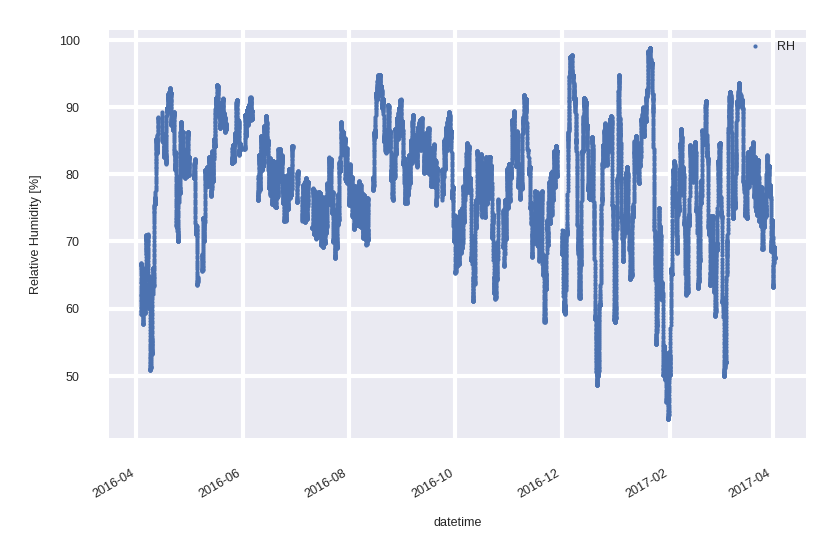

In [16]:
dfhtown['T']=(dfhtown['TEMP']-32)/1.8
dfhtown['TD']=(dfhtown['DEWP']-32)/1.8
dfhtown['RH']=dfhtown.eval(rel_hum_eqn)
dfhtown[['RH']].rolling(window=24*7).mean().plot(style='.');
plt.ylabel('Relative Humidity [%]');

In [17]:
dfhtown.describe()

,DIR,SPD,VSB,TEMP,DEWP,ALT,T,TD,RH
count,20087.000000,25833.000000,23997.000000,25844.000000,25844.000000,25853.000000,25844.000000,25844.000000,25844.000000
mean,168.682232,6.866527,8.109147,71.196835,63.041751,30.041237,21.776019,17.245417,78.277455
std,108.760045,5.283873,2.605837,12.736647,13.240728,0.162329,7.075915,7.355960,19.340430
min,10.000000,0.000000,0.000000,19.000000,10.000000,29.450000,-7.222222,-12.222222,17.552120
25%,110.000000,3.000000,7.000000,64.000000,57.000000,29.950000,17.777778,13.888889,64.138382
50%,170.000000,7.000000,9.100000,73.000000,66.000000,30.020000,22.777778,18.888889,83.472995
75%,200.000000,10.000000,10.000000,81.000000,73.000000,30.130000,27.222222,22.777778,93.564177
max,990.000000,36.000000,10.000000,99.000000,81.000000,30.790000,37.222222,27.222222,100.000000


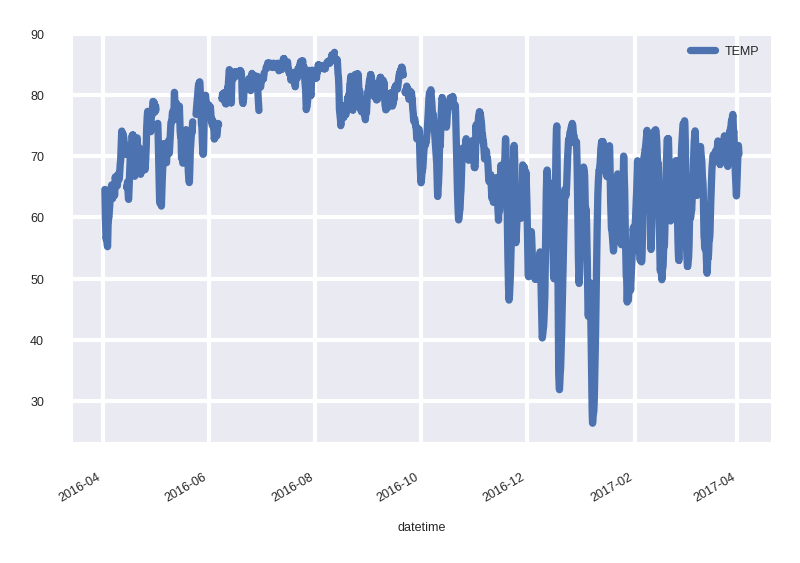

In [18]:
dfhtown.rolling(window=72).mean()[['TEMP']].plot();


The vapor pressure answers will be in units of millibars (mb) or hectoPascals (hPa).
To convert the saturated vapor pressure and/or the actual vapor pressure, the
temperature values must be converted to degrees Celsius (°C) .

In [0]:
vp='6.11*(10**((7.5*{T})/(237.3+{T})))'
dfhtown['e']=0.1*dfhtown.eval(vp.format(T='TD')) #converted from hPa to kPa
dfhtown['es']=0.1*dfhtown.eval(vp.format(T='T')) #converted from hPa to kPa

Let's verify calculation

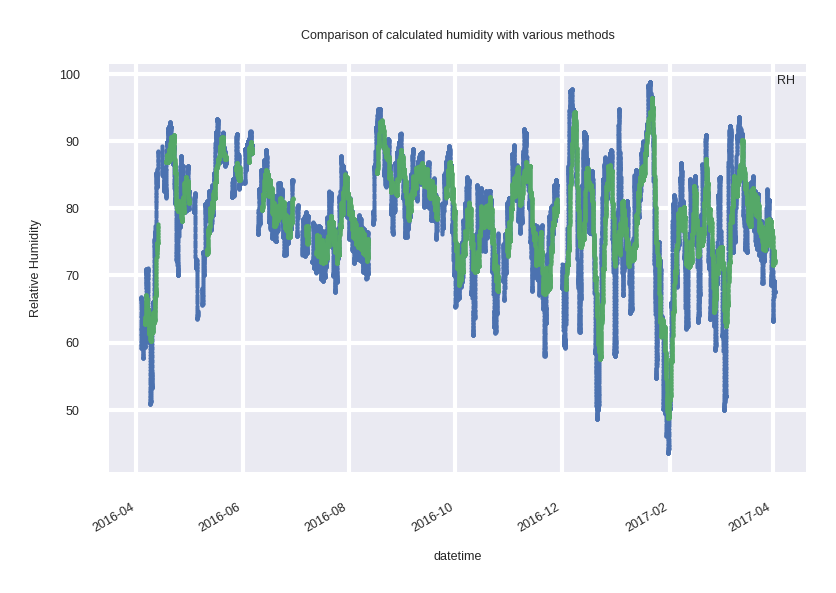

In [20]:
ax1=dfhtown[['RH']].rolling(window=24*7).mean().plot(style='.')
(dfhtown.e/dfhtown.es*100.).rolling(window=24*7*2).mean().plot(style='.',ax=ax1)
plt.ylabel('Relative Humidity')
plt.title('Comparison of calculated humidity with various methods');

Back to apparent temperature (AT)!

In [0]:
AT = "-2.7 + 1.04*T + 2.0*e -0.65*v"

In [0]:
dfhtown['v']=dfhtown.SPD*0.44704 #MPH to m/s

In [0]:
dfhtown['AT']=dfhtown.eval(AT)

Text(0,0.5,'Delta T [deg. C]')

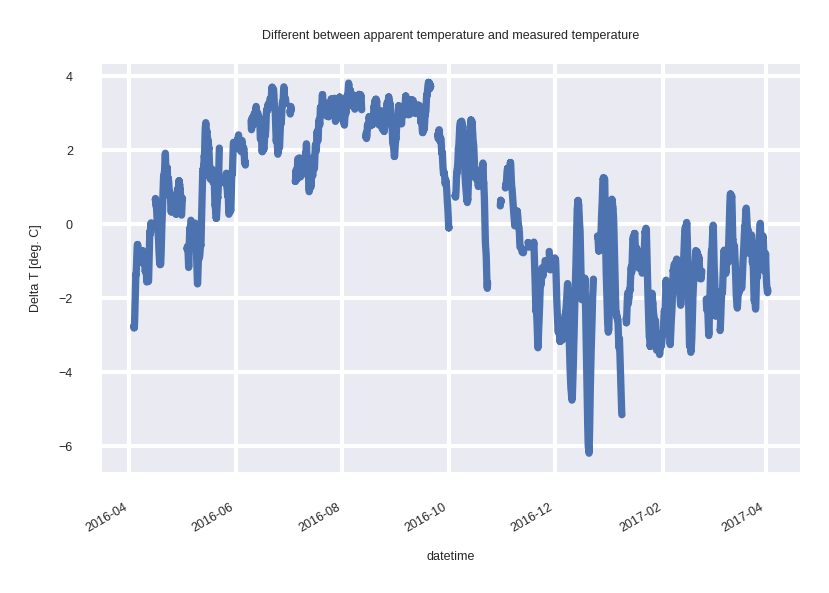

In [36]:
plt.figure()
dfhtown.eval('AT-T').rolling(window=7*24).mean().plot()
plt.title('Different between apparent temperature and measured temperature')
plt.ylabel('Delta T [deg. C]')

Comfortable apparent temperature **22-27** deg. C

https://en.wikipedia.org/wiki/Thermal_comfort

In [0]:
ixat = (dfhtown.AT>22) & (dfhtown.AT<27)

Comfortable hours to spend time outdoors are between 7am and 8pm

In [0]:
dfhtown['hour']=dfhtown.index.map(lambda x: x.hour)
ixhr = (dfhtown.AT>7) & (dfhtown.hour<20)

When humidity is above 95% - very high chances of rain! So not good for outdoors...

In [0]:
ixrh = dfhtown.RH<95

In [40]:
dfhtown[ixat & ixhr & ixrh].resample("H").sum().resample('M').AT.count()[:-1]
#.plot()
#plt.ylabel('Total hours comfortable outdoors in a month');

datetime
2016-04-30    720
2016-05-31    744
2016-06-30    720
2016-07-31    744
2016-08-31    744
2016-09-30    720
2016-10-31    744
2016-11-30    720
2016-12-31    744
2017-01-31    744
2017-02-28    672
2017-03-31    744
Freq: M, Name: AT, dtype: int64

## Deep learning approach

This part is based on the deep learning book "Deep Learning with Python" by Keras Lead François Chollet

https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.3-advanced-usage-of-recurrent-neural-networks.ipynb

In [90]:
import tensorflow as tf
print("tensorflow version = {}".format(tf.__version__))

import keras
print("keras version = {}".format(keras.__version__))


tensorflow version = 1.12.0
keras version = 2.2.4


## Transforming the data


The exact formulation of our problem will be the following: given data going as far back as `lookback` timesteps (a timestep is 10 minutes) 
and sampled every `steps` timesteps, can we predict the temperature in `delay` timesteps?

We will use the following parameter values:

* `lookback = 360`, i.e. our observations will go back 5 days.
* `steps = 3`, i.e. our observations will be sampled at one data point per hour.
* `delay = 72`, i.e. our targets will be 24 hours in the future.

To get started, we need to do two things:

* Preprocess the data to a format a neural network can ingest. This is easy: the data is already numerical, so we don't need to do any 
vectorization. However each timeseries in the data is on a different scale (e.g. temperature is typically between -20 and +30, but 
pressure, measured in mbar, is around 1000). So we will normalize each timeseries independently so that they all take small values on a 
similar scale.
* Write a Python generator that takes our current array of float data and yields batches of data from the recent past, alongside with a 
target temperature in the future. Since the samples in our dataset are highly redundant (e.g. sample `N` and sample `N + 1` will have most 
of their timesteps in common), it would be very wasteful to explicitly allocate every sample. Instead, we will generate the samples on the 
fly using the original data.

We preprocess the data by subtracting the mean of each timeseries and dividing by the standard deviation. We plan on using the first 
200,000 timesteps as training data, so we compute the mean and standard deviation only on this fraction of the data:

In [63]:
usedcols = 'DIR	TEMP	SPD	VSB	DEWP	ALT'.split('\t')
float_data = dfhtown[usedcols].dropna()
display(float_data.head(2))
float_data = float_data.values
float_data.shape

,DIR,TEMP,SPD,VSB,DEWP,ALT
datetime,,,,,,
2016-04-01 00:35:00,330.0,75.0,6.0,9.1,66.0,29.66
2016-04-01 00:55:00,330.0,73.0,3.0,10.0,66.0,29.67


(18771, 6)

In [0]:
mean = float_data.mean(axis=0)
float_data -= mean
std = float_data.std(axis=0)
float_data /= std

No handles with labels found to put in legend.


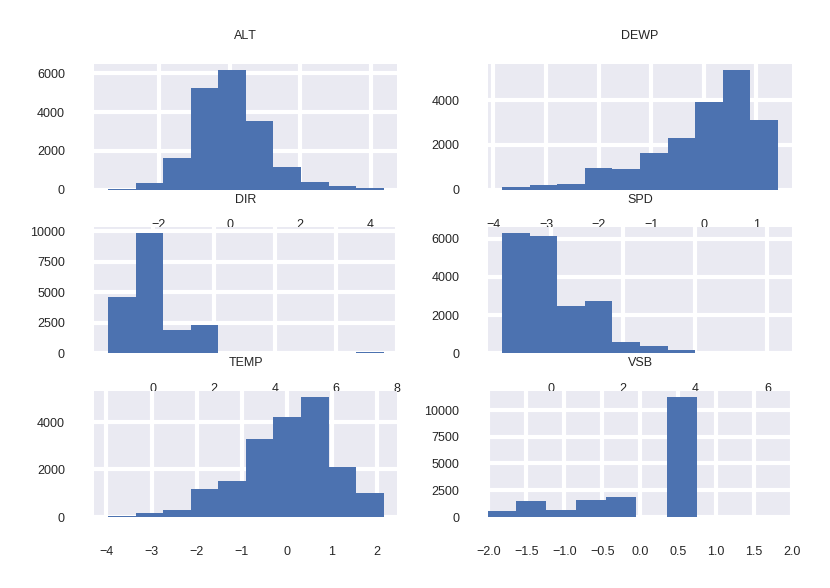

In [66]:
pd.DataFrame(float_data, columns = usedcols).hist()
plt.xlim([-2,2])
plt.legend()

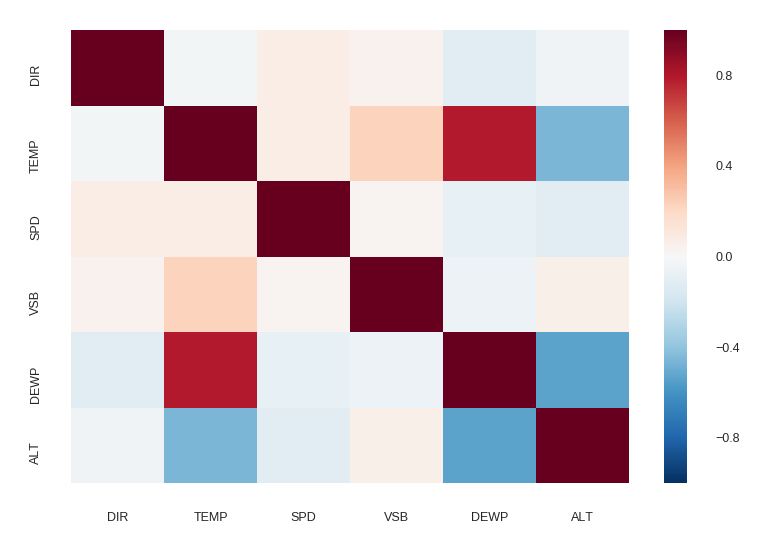

In [68]:
import seaborn as sns
#plt.matshow(pd.DataFrame(float_data, columns = usedcols).corr())

sns.heatmap(pd.DataFrame(float_data, columns = usedcols).corr(),
            xticklabels=usedcols,
            yticklabels=usedcols)



Now here is the data generator that we will use. It yields a tuple `(samples, targets)` where `samples` is one batch of input data and 
`targets` is the corresponding array of target temperatures. It takes the following arguments:

* `data`: The original array of floating point data, which we just normalized in the code snippet above.
* `lookback`: How many timesteps back should our input data go.
* `delay`: How many timesteps in the future should our target be.
* `min_index` and `max_index`: Indices in the `data` array that delimit which timesteps to draw from. This is useful for keeping a segment 
of the data for validation and another one for testing.
* `shuffle`: Whether to shuffle our samples or draw them in chronological order.
* `batch_size`: The number of samples per batch.
* `step`: The period, in timesteps, at which we sample data. We will set it 6 in order to draw one data point every hour.

In [0]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while True:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

Now let's use our abstract generator function to instantiate three generators, one for training, one for validation and one for testing. Each will look at different temporal segments of the original data: the training generator looks at the first 200,000 timesteps, the validation generator looks at the following 100,000, and the test generator looks at the remainder.

In [96]:
float_data.shape

(18771, 6)

In [0]:
lookback = 360
step = 3
delay = 72
batch_size = 64
min_index_train = 0
max_index_train = 12000

min_index_valid = 12001
max_index_valid = 18000

def gen_train_val_test():
  train_gen = generator(float_data,
                        lookback=lookback,
                        delay=delay,
                        min_index=min_index_train,
                        max_index=max_index_train,
                        shuffle=True,
                        step=step, 
                        batch_size=batch_size)
  val_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=min_index_valid,
                      max_index=max_index_valid,
                      step=step,
                      batch_size=batch_size)
  test_gen = generator(float_data,
                       lookback=lookback,
                       delay=delay,
                       min_index=max_index_valid,
                       max_index=None,
                       step=step,
                       batch_size=batch_size)
  return train_gen, val_gen, test_gen

train_gen, val_gen, test_gen = gen_train_val_test()


# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (max_index_valid - min_index_valid - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (len(float_data) - max_index_valid - lookback) // batch_size

## A common sense, non-machine learning baseline


In our case, the temperature timeseries can safely be assumed to be continuous (the temperatures tomorrow are likely to be close to the temperatures today) as well as periodical with a daily period. Thus a common sense approach would be to always predict that the temperature 24 hours from now will be equal to the temperature right now. Let's evaluate this approach, using the Mean Absolute Error metric (MAE). Mean Absolute Error is simply equal to:

0.649737159589518


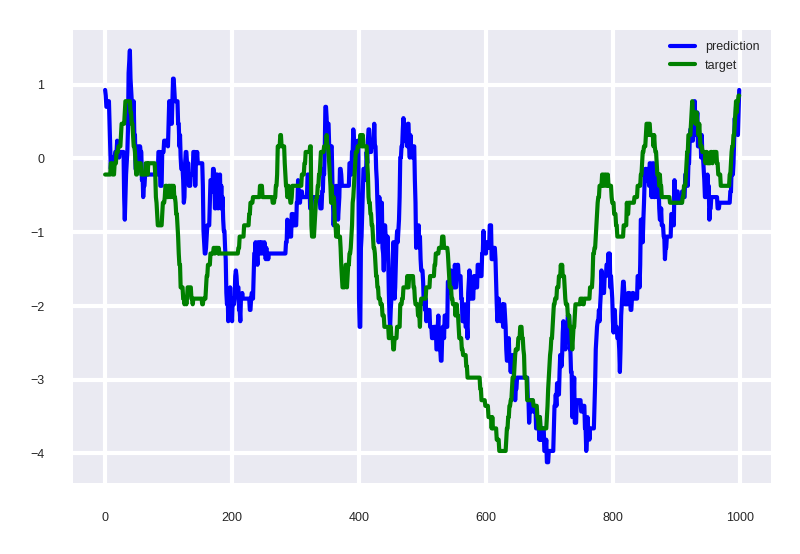

In [71]:
batch_maes = []
predsi = []
targetsi = []
for step in range(val_steps):
    samples, targets = next(val_gen)
    preds = samples[:, -1, 1]
    predslast = samples[:, -2, 1]
    preds = preds + preds - predslast
    mae = np.mean(np.abs(preds - targets))
    batch_maes.append(mae)
    predsi.extend(preds)
    targetsi.extend(targets)
print(np.mean(batch_maes))
plt.plot(predsi[:1000], 'b', linewidth=1, label='prediction');
plt.plot(targetsi[:1000], 'g', linewidth=1, label='target');
plt.legend();

## A basic machine learning approach

In the same way that it is useful to establish a common sense baseline before trying machine learning approaches, it is useful to try simple and cheap machine learning models (such as small densely-connected networks) before looking into complicated and computationally expensive models such as RNNs. This is the best way to make sure that any further complexity we throw at the problem later on is legitimate and delivers real benefits.

Here is a simply fully-connected model in which we start by flattening the data, then run it through two Dense layers. Note the lack of activation function on the last Dense layer, which is typical for a regression problem. We use MAE as the loss. Since we are evaluating on the exact same data and with the exact same metric as with our common sense approach, the results will be directly comparable.

In [72]:
lookback // step, float_data.shape[-1]

(4, 6)

In [0]:
# from keras.models import Sequential
# from keras import layers
# from keras.optimizers import RMSprop

# model = Sequential()
# #model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
# model.add(layers.Flatten(input_shape=(None, float_data.shape[-1])))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(1))

# model.compile(optimizer=RMSprop(), loss='mae')
# history = model.fit_generator(train_gen,
#                               steps_per_epoch=500,
#                               epochs=20,
#                               #validation_data=val_gen,
#                               #validation_steps=val_steps
#                              )

In [0]:
# import matplotlib.pyplot as plt

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(loss))

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

## Using Recurrent Neural Networks
### Gated Recurrent Unit - GRU cells
### Long Short-Term Memory - LSTM cells

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Long_Short-Term_Memory.svg/1594px-Long_Short-Term_Memory.svg.png)

In [91]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

train_gen, val_gen, test_gen = gen_train_val_test()

model = Sequential()
#model.add(layers.GRU(16, implementation=2, input_shape=(None, float_data.shape[-1])))
model.add(layers.CuDNNGRU(16, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=80,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
80/80 [==============================] - 4s 53ms/step - loss: 0.5599 - val_loss: 0.6423
Epoch 2/20
80/80 [==============================] - 3s 34ms/step - loss: 0.5089 - val_loss: 0.6319
Epoch 3/20
80/80 [==============================] - 3s 33ms/step - loss: 0.4931 - val_loss: 0.6019
Epoch 4/20
80/80 [==============================] - 3s 33ms/step - loss: 0.4921 - val_loss: 0.6151
Epoch 5/20
80/80 [==============================] - 3s 33ms/step - loss: 0.4785 - val_loss: 0.5905
Epoch 6/20
80/80 [==============================] - 3s 33ms/step - loss: 0.4696 - val_loss: 0.5925
Epoch 7/20
80/80 [==============================] - 3s 33ms/step - loss: 0.4587 - val_loss: 0.5977
Epoch 8/20
80/80 [==============================] - 3s 33ms/step - loss: 0.4596 - val_loss: 0.6064
Epoch 9/20
80/80 [==============================] - 3s 33ms/step - loss: 0.4414 - val_loss: 0.6027
Epoch 10/20
80/80 [==============================] - 3s 33ms/step - loss: 0.4455 - val_loss: 0.5918
Epoch 11/

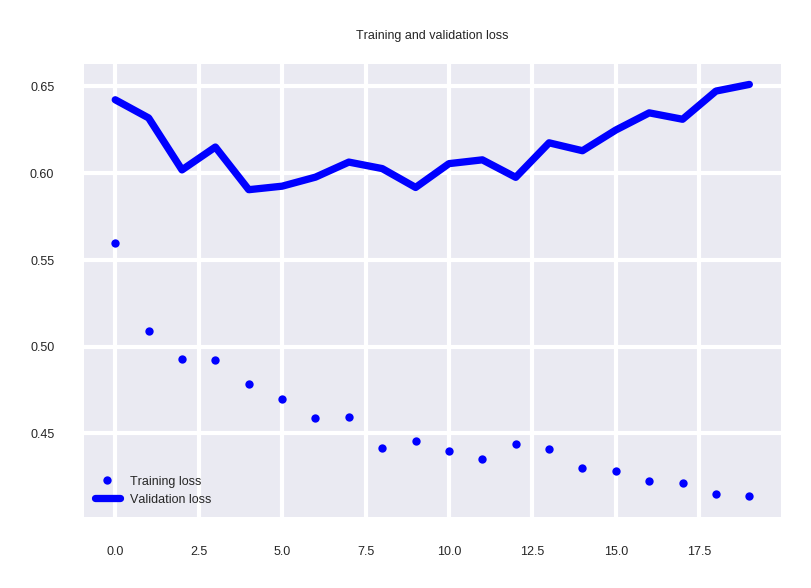

In [92]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [98]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

train_gen, val_gen, test_gen = gen_train_val_test()

model = Sequential()
model.add(layers.GRU(64,
                     #dropout=0.1,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=20,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps
                             )

Epoch 1/40
20/20 [==============================] - 14s 681ms/step - loss: 0.5384 - val_loss: 0.6619
Epoch 2/40
20/20 [==============================] - 12s 580ms/step - loss: 0.5094 - val_loss: 0.6319
Epoch 3/40
20/20 [==============================] - 12s 579ms/step - loss: 0.4975 - val_loss: 0.6321
Epoch 4/40
20/20 [==============================] - 12s 583ms/step - loss: 0.5255 - val_loss: 0.6550
Epoch 5/40
20/20 [==============================] - 11s 565ms/step - loss: 0.4929 - val_loss: 0.6330
Epoch 6/40
20/20 [==============================] - 11s 568ms/step - loss: 0.4793 - val_loss: 0.6046
Epoch 7/40
20/20 [==============================] - 11s 568ms/step - loss: 0.5135 - val_loss: 0.5886
Epoch 8/40
20/20 [==============================] - 11s 568ms/step - loss: 0.4978 - val_loss: 0.5772
Epoch 9/40
20/20 [==============================] - 11s 569ms/step - loss: 0.4998 - val_loss: 0.5809
Epoch 10/40
20/20 [==============================] - 12s 578ms/step - loss: 0.4775 - val_lo

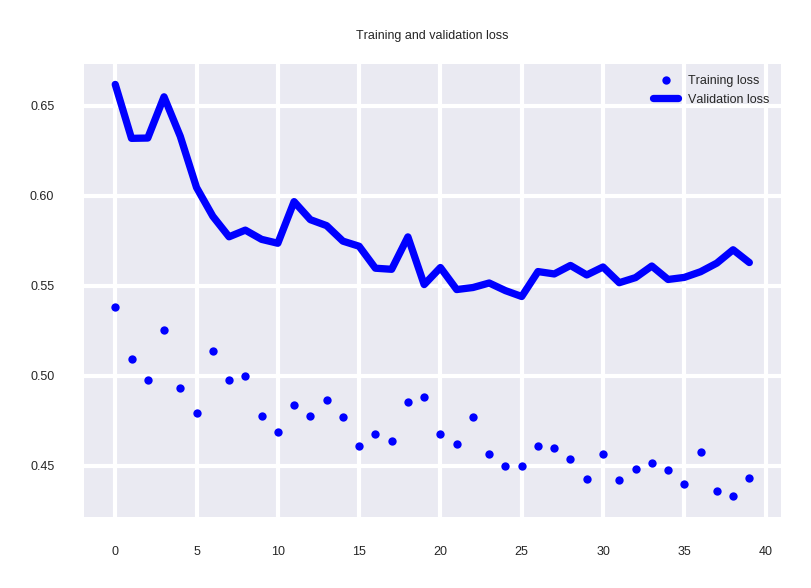

In [101]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [102]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_10 (GRU)                 (None, 64)                13632     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________


0.6658328132574057


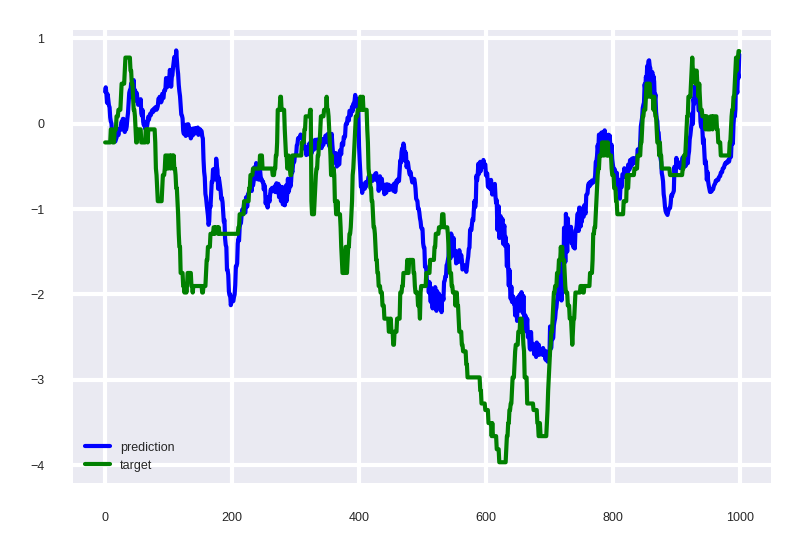

In [103]:
train_gen, val_gen, test_gen = gen_train_val_test()

batch_maes = []
predsi = []
targetsi = []
for step in range(val_steps):
    samples, targets = next(val_gen)
    preds = model.predict(samples)
    mae = np.mean(np.abs(preds - targets))
    #print(mae)
    batch_maes.append(mae)
    predsi.extend(preds)
    targetsi.extend(targets)
print(np.mean(batch_maes))
plt.plot(predsi[:1000], 'b', linewidth=1, label='prediction');
plt.plot(targetsi[:1000], 'g', linewidth=1, label='target');
plt.legend();